
Q.1 Support Vector Machine:

Data and other details are available at 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Use the weblink and reproduce the result for SVM.

    1. Implement SVM to classify the type of iris flower based on its sepal length and width using the iris dataset? 
    2. Also try to use the scikit-learn digits dataset and an SVM to classify handwritten digits? 

For both datasets, provide a step-by-step code, including:  

    1. Loading the dataset 
    2. Visualizing the data 
    3. Splitting the data into training and testing sets 
    4. Initializing and training the SVM model 
    5. Testing the model 




Accuracy on the Iris dataset: 0.8
Classification Report for Iris Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



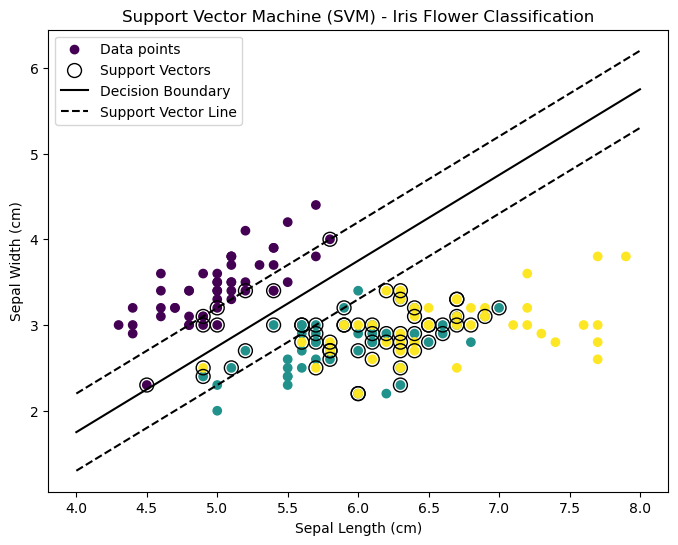

In [77]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Loading the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Using only the first two features (sepal length and width)
y = iris.target



# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Testing the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the Iris dataset:", accuracy)

print("Classification Report for Iris Dataset:")
print(classification_report(y_test, y_pred))


# Plotting the decision boundary and support vectors
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='Data points')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Plot support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Plot decision boundary (hyperplane)
w = svm_model.coef_[0]
a = -w[0] / w[1]  # Slope of the hyperplane
xx = np.linspace(4, 8)
yy = a * xx - (svm_model.intercept_[0]) / w[1]  # Equation of the hyperplane
plt.plot(xx, yy, 'k-', label='Decision Boundary')

# Plot support vector line
support_vector_line = a * xx - (svm_model.intercept_[0] - 1) / w[1]  # Margin line parallel to the hyperplane
plt.plot(xx, support_vector_line, 'k--', label='Support Vector Line')

support_vector_line = a * xx - (svm_model.intercept_[0] + 1) / w[1]  # Margin line parallel to the hyperplane
plt.plot(xx, support_vector_line, 'k--')

plt.legend()
plt.title('Support Vector Machine (SVM) - Iris Flower Classification')
plt.show()



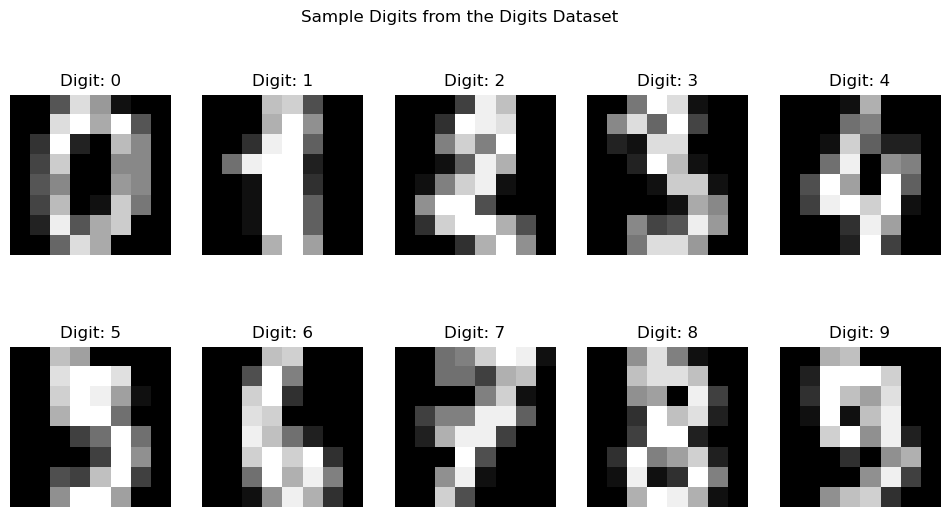

Accuracy on the digits dataset: 0.987037037037037
Classification Report for Iris Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      0.98      0.98        54
           4       1.00      1.00      1.00        60
           5       1.00      0.98      0.99        66
           6       0.98      1.00      0.99        53
           7       0.98      0.98      0.98        55
           8       0.95      0.98      0.97        43
           9       0.97      0.95      0.96        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [76]:
# Importing necessary libraries
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Loading the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Visualizing a few sample digits
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Digit: {digits.target[i]}")
    plt.axis('off')
plt.suptitle('Sample Digits from the Digits Dataset')
plt.show()


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Testing the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the digits dataset:", accuracy)

print("Classification Report for Iris Dataset:")
print(classification_report(y_test, y_pred))



# Q. 2 Principal Component Analysis:

    1. To do PCA, use the Eigen decomposition available in numpy. The dataset can be obtained from https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html#sphx-glr-auto-examples-decomposition-plot-pca-3d-py. 
    2.DO NOT USE the code available for PCA in the same link (as mentioned above, use numpy's Eigen decomposition). 
    3. Compare your results with the one available in the link (here, you are free to use the code available in the link to generate any numbers for comparison). 
    4. Are you getting the same result?


The top 3 eigen vectors in PCA using numpy are:
[[ 0.52106591 -0.37741762 -0.71956635]
 [-0.26934744 -0.92329566  0.24438178]
 [ 0.5804131  -0.02449161  0.14212637]
 [ 0.56485654 -0.06694199  0.63427274]]


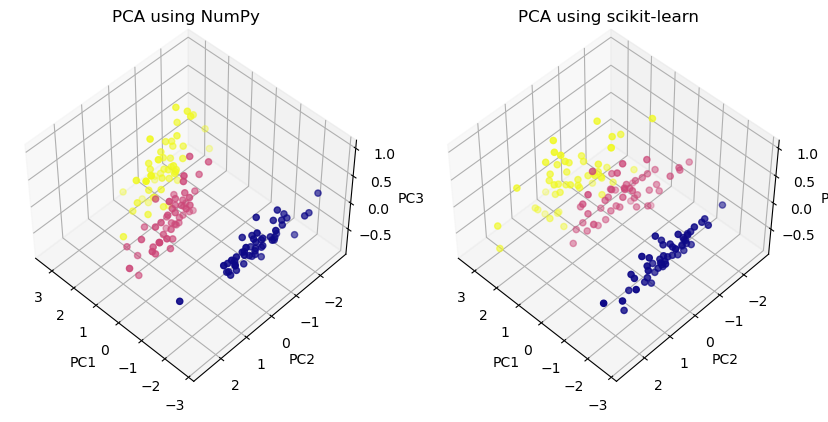

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target


X_scaled = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)

# Calculate the covariance matrix
cov_matrix = np.cov(X_scaled.T) 

# Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Choose top k eigenvectors (let's say top 3 for comparison with the link)
k = 3
top_k_eigenvectors = sorted_eigenvectors[:, :k]

print(f'The top {k} eigen vectors in PCA using numpy are:')
print(top_k_eigenvectors)

# Project the original data onto the principal components
X_pca = np.dot(X_scaled, top_k_eigenvectors)

# Use PCA from scikit-learn for comparison
pca_sklearn = PCA(n_components=k)
X_pca_sklearn = pca_sklearn.fit_transform(X_scaled)

# Now, let's compare the results visually by plotting the first three principal components
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d',  elev=48, azim=134)
ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap=plt.cm.plasma)
ax1.set_title('PCA using NumPy')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

ax2 = fig.add_subplot(122, projection='3d',  elev=48, azim=134)
ax2.scatter(X_pca_sklearn[:, 0], X_pca_sklearn[:, 1], X_pca_sklearn[:, 2], c=y, cmap=plt.cm.plasma)
ax2.set_title('PCA using scikit-learn')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

plt.show()


# Q.2.4. Are you getting the same result?

We are not getting same result. But PCA using numpy approximates to the result whatever we got from PCA using scikit-learn.